# Plot of validation test

This notebook plots the validation test for multiple inversions. It plots the values of the goal function for all the inversions resulted from multiple inversion notebook.

In [1]:
import numpy as np
import cPickle as pickle

In [2]:
# importing my functions
import sys
sys.path.insert(0, '../../code')

import mag_polyprism_functions as mfun

/home/leonardo/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [3]:
# importing the pickle file of results
result_path = 'tfa_inversion/upward_multiple_int_min11_int_max20_z0_min0_z0_max180_r700_dz900_V20_L6Apr-29-2020/'

with open(result_path+'inversion.pickle') as w:
        inversion = pickle.load(w)

In [4]:
# directory to save the figures
filename = '../../manuscript/figures/real_gamma.png'

In [5]:
z0 = inversion['z0']
intensity = inversion['intensity']
z0_plot, int_plot = np.meshgrid(z0, intensity)
z0_plot = z0_plot.ravel()
int_plot = int_plot.ravel()
n = z0.size
m = intensity.size
N = inversion['x'].size

In [6]:
# building the matrix of the goal function
gamma_matrix = mfun.goal_matrix(n, m, inversion['results'])

In [7]:
# building the matrix of the misfit function
phi_matrix = mfun.misfit_matrix(n, m, inversion['results'])

In [8]:
# calculating the magnetic susceptibily
H0 = (22768.*1e-9)/(4*np.pi*1e-7)
sus = intensity/H0

In [9]:
np.argwhere(gamma_matrix<=560)

array([[0, 3],
       [0, 6],
       [1, 3]])

In [10]:
gamma_matrix[0,3]

550.3006233230848

In [11]:
gamma_matrix.shape

(10, 10)

# Figures

/home/leonardo/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


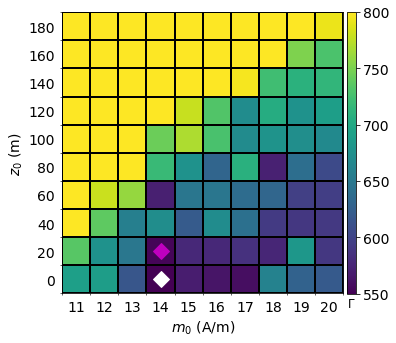

In [12]:
mfun.plot_real_matrix(z0, intensity, gamma_matrix, 550., 800., sus, filename)

Application to the field data over the Anitápolis complex, Brazil. Goal function $\Gamma(\mathbf{p})$, in nT,  produced by estimated models with different depths-to-the-top ($ z_0 $) and total-magnetization intensities ($ m_0 $). The corresponding range of magnetic susceptibility $\chi$ is represented in the upper axis by considering a purely induced magnetization with inducing field $\approx 22 \, 768 $ nT. The magenta diamond represents the estimated model that produces the lowest value of $ \Gamma(\mathbf{p})$. The cyan diamond represents an alternative model whose magnetic susceptibility is also compatible with values found at the Jacupiranga complex in a previous work \citep[][ tb. 1]{valdivia-2009}.

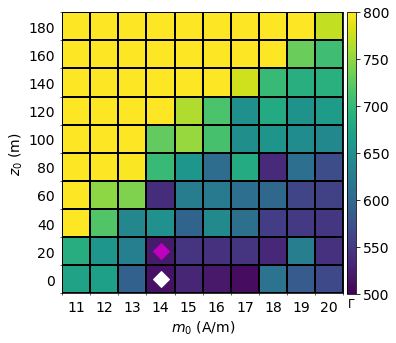

In [13]:
mfun.plot_real_matrix(z0, intensity, phi_matrix, 500., 800., sus)

Application to the field data over the Anitápolis complex, Brazil. Misfit function $\phi(\mathbf{p})$, in nT,  produced by estimated models with different depths-to-the-top ($ z_0 $) and total-magnetization intensities ($ m_0 $). The corresponding range of magnetic susceptibility $\chi$ is represented in the upper axis by considering a purely induced magnetization with inducing field $\approx 22 \, 768 $ nT. The magenta diamond represents the estimated model that produces the lowest value of $ \Gamma(\mathbf{p})$. The cyan diamond represents an alternative model whose magnetic susceptibility is also compatible with values found at the Jacupiranga complex in a previous work \citep[][ tb. 1]{valdivia-2009}.